In [ ]:
import pandas as pd # data processing, CSV file I/O (excel)
import matplotlib.pyplot as plt # plotting
import seaborn as sns   # more plotting
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('heart.csv') # read in the data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.isnull().sum()   # check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()   # get some basic stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


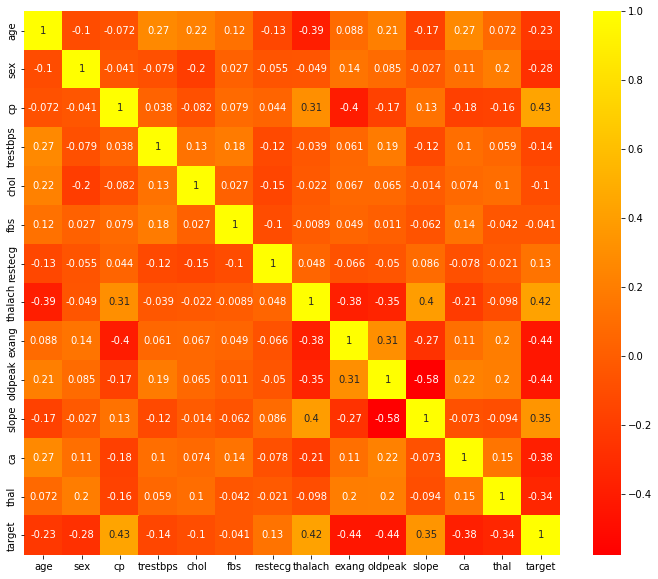

In [ ]:
#heatmap
corrmat = df.corr() # get the correlation matrix
top_corr_features = corrmat.index # get the features
plt.figure(figsize=(12,10))     # set the size of the plot
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="autumn") # plot the heat map


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42bce03c50>,
      dtype=object)

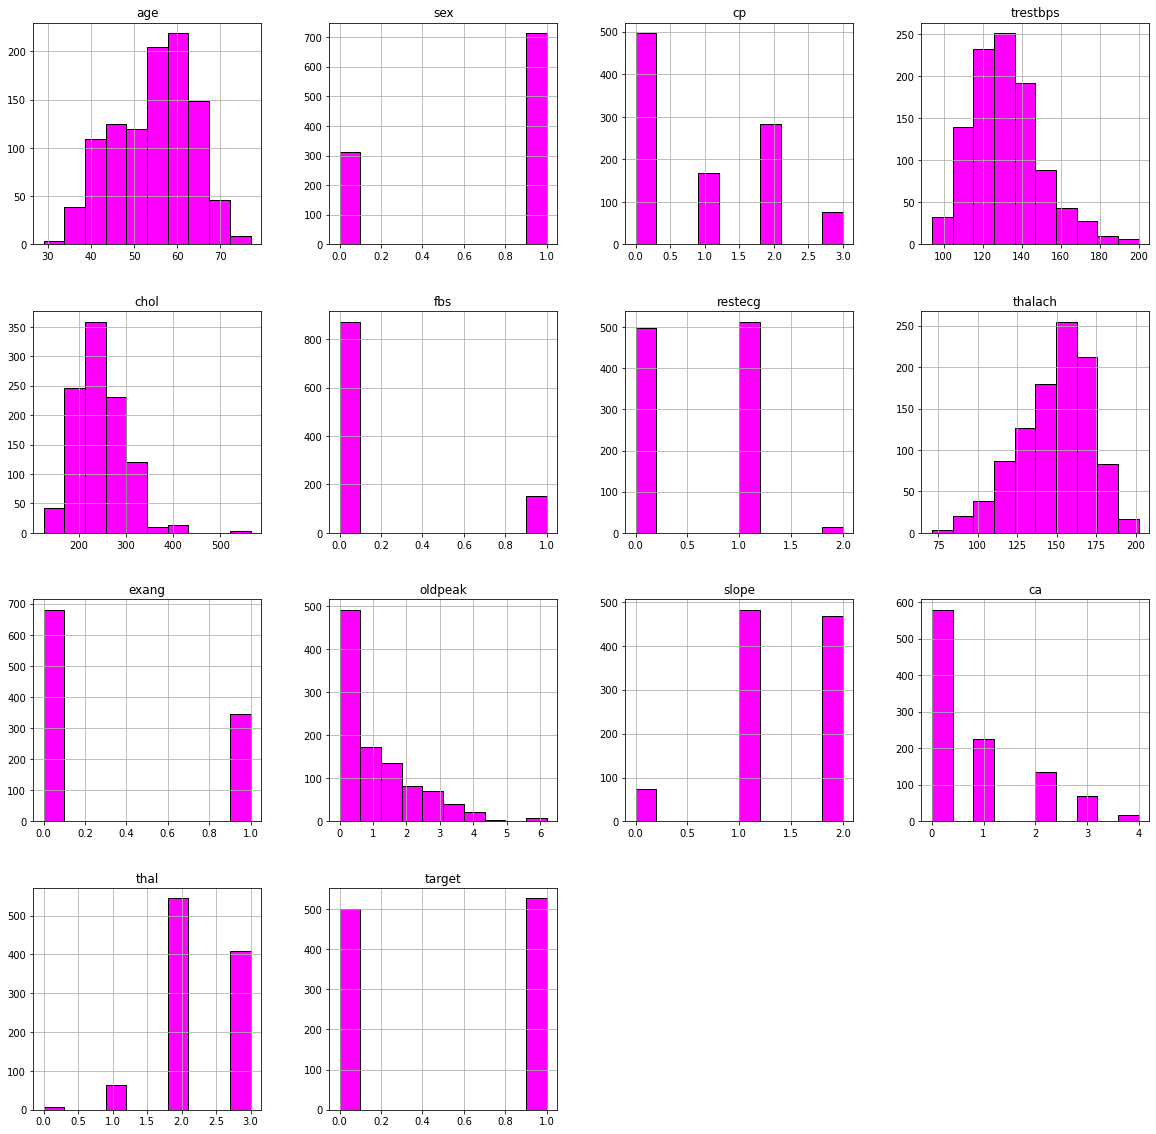

In [ ]:
df.hist(figsize=(20,20),color='magenta',edgecolor='black') # plot the histograms

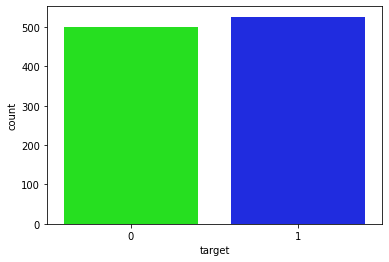

In [ ]:
sns.countplot(x='target',data=df,palette='hsv') # plot the countplot

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split # import the split
X = df.drop('target',axis=1) # get the features
y = df.target # get the target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # split the data



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) # fit the model
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix # import the metrics
print(classification_report(y_test,predictions)) # print the classification report
coufusion_matrix = confusion_matrix(y_test,predictions) # get the confusion matrix
print(coufusion_matrix)
accuracy = logmodel.score(X_test,y_test)
print(accuracy)

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205

[[71 31]
 [13 90]]
0.7853658536585366


In [ ]:

import numpy as np
data = (52,1,0,128,204,1,1,156,1,1,1,0,0)
data = np.array(data)
data = data.reshape(1,-1)
print(data)
print(logmodel.predict(data))

if(logmodel.predict(data) == 1):
    print("The patient is likely to have heart disease")
else:
    print("The patient is likely to have no heart disease")

[[ 52   1   0 128 204   1   1 156   1   1   1   0   0]]
[1]
The patient is likely to have heart disease


In [ ]:
#svc
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accuracy = svc_model.score(X_test,y_test)
print(accuracy)

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205

[[62 40]
 [25 78]]
0.6829268292682927


In [ ]:
data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
data = np.array(data)
data = data.reshape(1,-1)
print(data)
print(svc_model.predict(data))
if(svc_model.predict(data) == 1):
    print("The patient is likely to have heart disease")
else:
    print("The patient is likely to have no heart disease")

[[ 58   0   0 100 248   0   0 122   0   1   1   0   2]]
[0]
The patient is likely to have no heart disease


In [ ]:
#kneighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy = knn_model.score(X_test,y_test)
print(accuracy)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]
0.9853658536585366


In [ ]:
data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
data = np.array(data)
data = data.reshape(1,-1)
print(data)
print(knn_model.predict(data))
if(knn_model.predict(data) == 1):
    print("The patient is likely to have heart disease")
else:
    print("The patient is likely to have no heart disease")

[[ 58   0   0 100 248   0   0 122   0   1   1   0   2]]
[1]
The patient is likely to have heart disease


The best k value is: 1


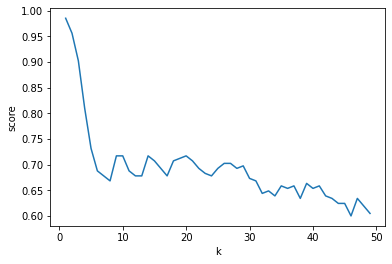

In [ ]:
score=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
plt.plot(range(1,50),score)
print("The best k value is:",score.index(max(score))+1)
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)
predictions = dtree_model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accuracy = dtree_model.score(X_test,y_test)
print(accuracy)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]
0.9853658536585366


In [ ]:
data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
data = np.array(data)
data = data.reshape(1,-1)
print(data)
print(dtree_model.predict(data))
if(dtree_model.predict(data) == 1):
    print("The patient is likely to have heart disease")
else:
    print("The patient is likely to have no heart disease")
    


[[ 58   0   0 100 248   0   0 122   0   1   1   0   2]]
[1]
The patient is likely to have heart disease


In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
predictions = nb_model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accura = nb_model.score(X_test,y_test)
print(accura)



              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

[[72 30]
 [11 92]]
0.8


In [ ]:
data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
data = np.array(data)
data = data.reshape(1,-1)
print(data)
print(nb_model.predict(data))
if(nb_model.predict(data) == 1):
    print("The patient is likely to have heart disease")
else:
    print("The patient is likely to have no heart disease")
    

[[ 58   0   0 100 248   0   0 122   0   1   1   0   2]]
[1]
The patient is likely to have heart disease


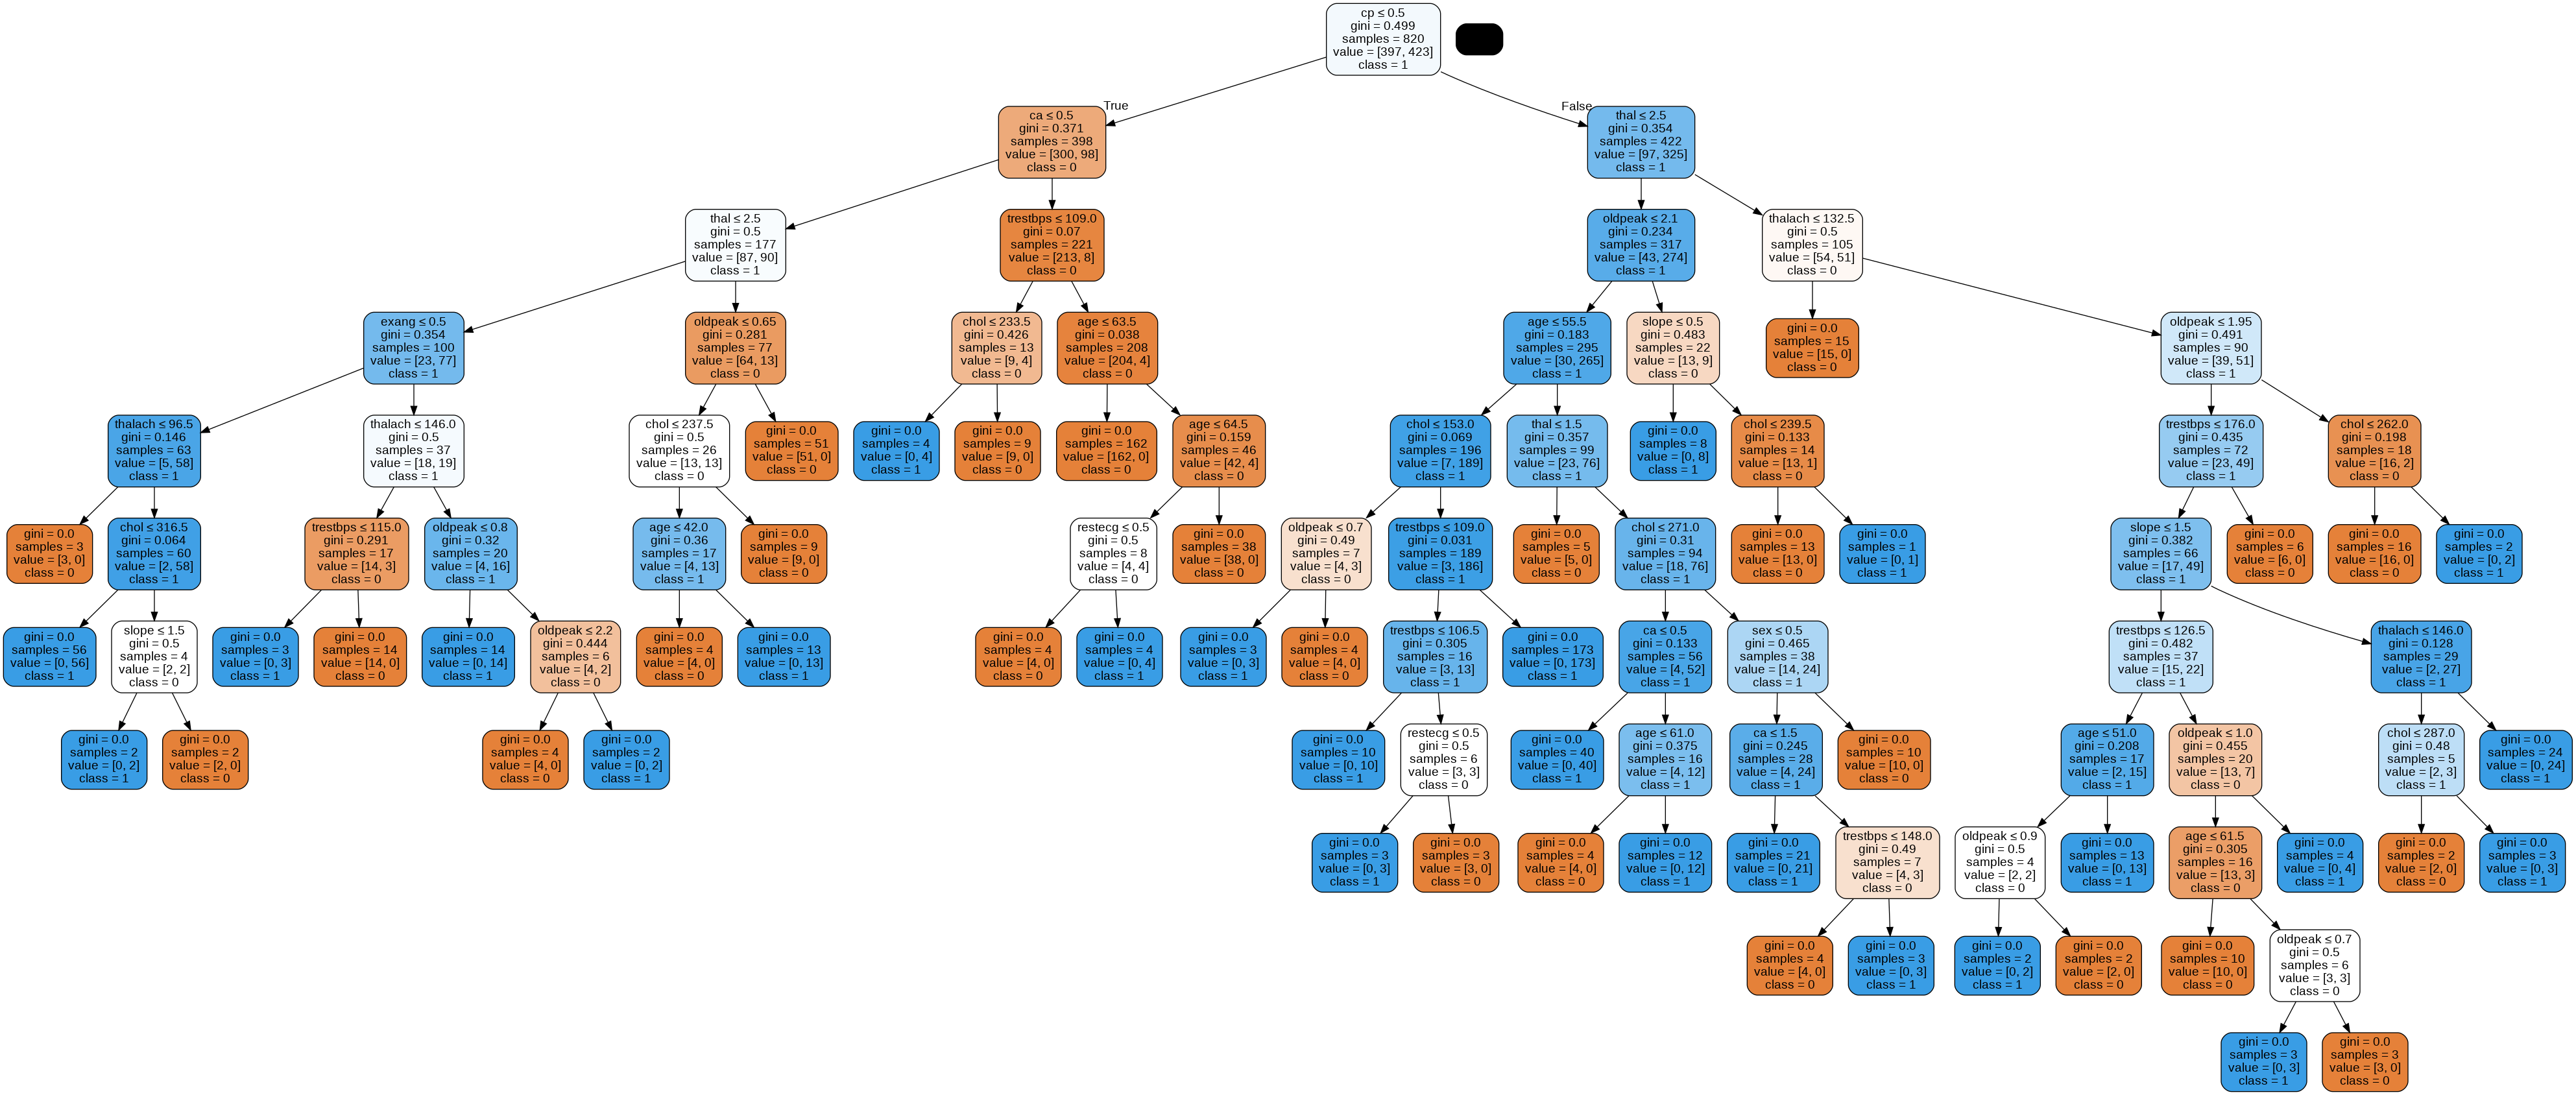

In [ ]:
#print decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,
                filled=True, rounded=True, special_characters=True, feature_names=X_train.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
